https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Split-Apply-Combine

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

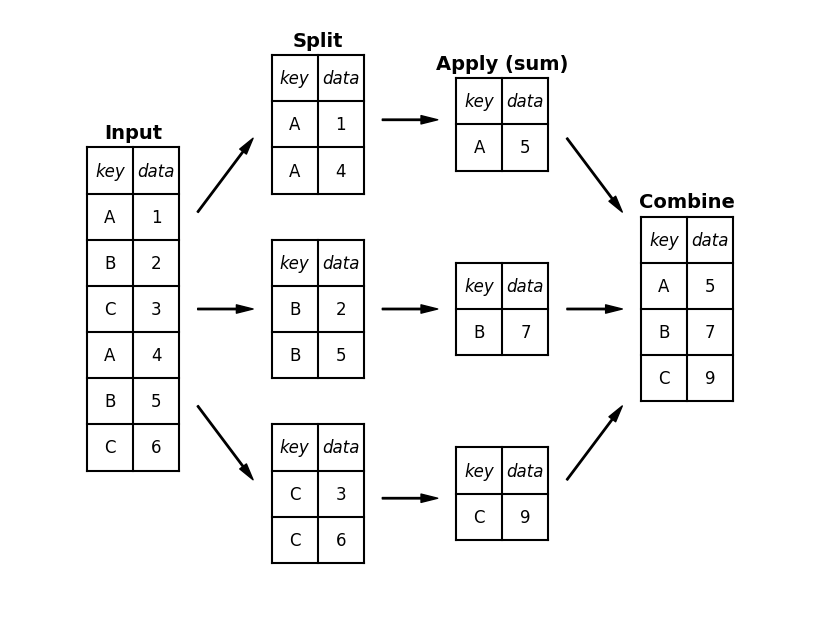

In [4]:
def draw_dataframe(df, loc=None, width=None, ax=None, linestyle=None,
                   textstyle=None):
    loc = loc or [0, 0]
    width = width or 1

    x, y = loc

    if ax is None:
        ax = plt.gca()

    ncols = len(df.columns) + 1
    nrows = len(df.index) + 1

    dx = dy = width / ncols

    if linestyle is None:
        linestyle = {'color':'black'}

    if textstyle is None:
        textstyle = {'size': 12}

    textstyle.update({'ha':'center', 'va':'center'})

    # draw vertical lines
    for i in range(ncols + 1):
        plt.plot(2 * [x + i * dx], [y, y + dy * nrows], **linestyle)

    # draw horizontal lines
    for i in range(nrows + 1):
        plt.plot([x, x + dx * ncols], 2 * [y + i * dy], **linestyle)

    # Create index labels
    for i in range(nrows - 1):
        plt.text(x + 0.5 * dx, y + (i + 0.5) * dy,
                 str(df.index[::-1][i]), **textstyle)

    # Create column labels
    for i in range(ncols - 1):
        plt.text(x + (i + 1.5) * dx, y + (nrows - 0.5) * dy,
                 str(df.columns[i]), style='italic', **textstyle)
        
    # Add index label
    if df.index.name:
        plt.text(x + 0.5 * dx, y + (nrows - 0.5) * dy,
                 str(df.index.name), style='italic', **textstyle)

    # Insert data
    for i in range(nrows - 1):
        for j in range(ncols - 1):
            plt.text(x + (j + 1.5) * dx,
                     y + (i + 0.5) * dy,
                     str(df.values[::-1][i, j]), **textstyle)


#----------------------------------------------------------
# Draw figure

import pandas as pd
df = pd.DataFrame({'data': [1, 2, 3, 4, 5, 6]},
                   index=['A', 'B', 'C', 'A', 'B', 'C'])
df.index.name = 'key'


fig = plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.axes([0, 0, 1, 1])

ax.axis('off')

draw_dataframe(df, [0, 0])

for y, ind in zip([3, 1, -1], 'ABC'):
    split = df[df.index == ind]
    draw_dataframe(split, [2, y])

    sum = pd.DataFrame(split.sum()).T
    sum.index = [ind]
    sum.index.name = 'key'
    sum.columns = ['data']
    draw_dataframe(sum, [4, y + 0.25])
    
result = df.groupby(df.index).sum()
draw_dataframe(result, [6, 0.75])

style = dict(fontsize=14, ha='center', weight='bold')
plt.text(0.5, 3.6, "Input", **style)
plt.text(2.5, 4.6, "Split", **style)
plt.text(4.5, 4.35, "Apply (sum)", **style)
plt.text(6.5, 2.85, "Combine", **style)

arrowprops = dict(facecolor='black', width=1, headwidth=6)
plt.annotate('', (1.8, 3.6), (1.2, 2.8), arrowprops=arrowprops)
plt.annotate('', (1.8, 1.75), (1.2, 1.75), arrowprops=arrowprops)
plt.annotate('', (1.8, -0.1), (1.2, 0.7), arrowprops=arrowprops)

plt.annotate('', (3.8, 3.8), (3.2, 3.8), arrowprops=arrowprops)
plt.annotate('', (3.8, 1.75), (3.2, 1.75), arrowprops=arrowprops)
plt.annotate('', (3.8, -0.3), (3.2, -0.3), arrowprops=arrowprops)

plt.annotate('', (5.8, 2.8), (5.2, 3.6), arrowprops=arrowprops)
plt.annotate('', (5.8, 1.75), (5.2, 1.75), arrowprops=arrowprops)
plt.annotate('', (5.8, 0.7), (5.2, -0.1), arrowprops=arrowprops)
    
plt.axis('equal')
plt.ylim(-1.5, 5);

fig.savefig('split-apply-combine.png')